# Experiment-Notebook

In [1]:
import os
import gc
import torch
import contextlib

from FedAvgController import FedAvgController

# since this Notebook is in the code folder, we need to go up one level, so every module works as expected
if(os.getcwd().endswith("code")):
    os.chdir("..")
print(os.getcwd())

c:\Users\PC\Desktop\FederatedLearning\FederatedLearning


In [2]:
def run_experiment(config: dict):
    controller = FedAvgController("models/host_model_50_epochs.pth", config)
    os.makedirs(os.path.join("results", controller.experiment_name), exist_ok=True)
    with open(os.path.join("results", controller.experiment_name, "output"), "w") as f, contextlib.redirect_stdout(f):
        controller.run(test=True)
        controller.host.save_model(os.path.join("results", controller.experiment_name), f"model_50_{controller.experiment_name}.pth")

    del controller
    gc.collect()
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

# FedAvg Experiments
### Experiment 1.1 - Ground Truth Labels

Epoch 1/1: 100%|██████████| 20/20 [00:07<00:00,  2.51it/s]


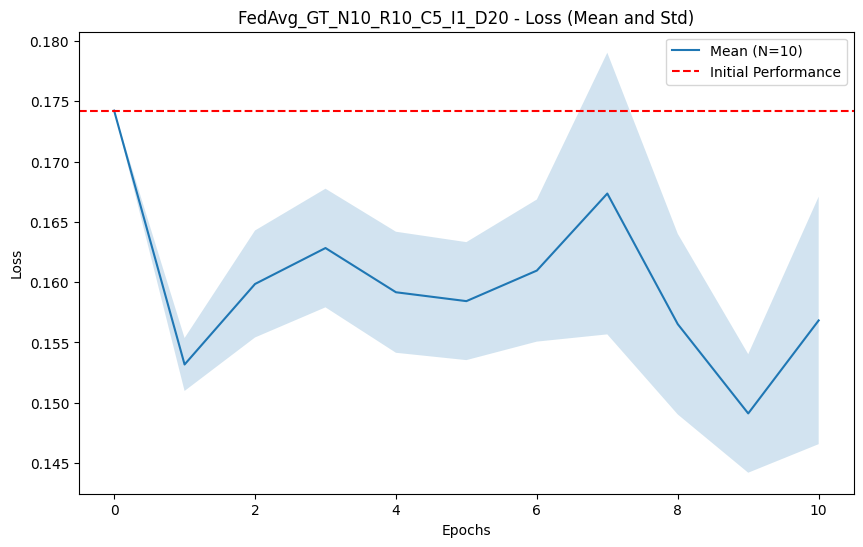

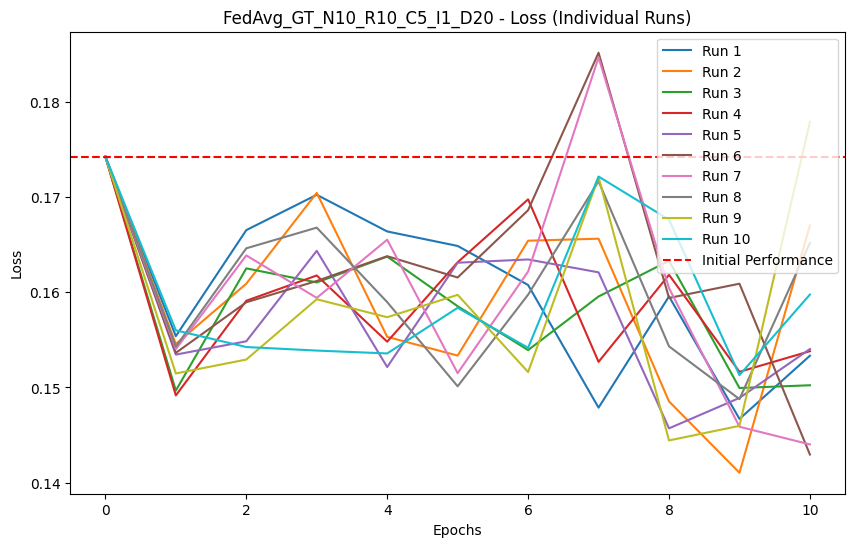

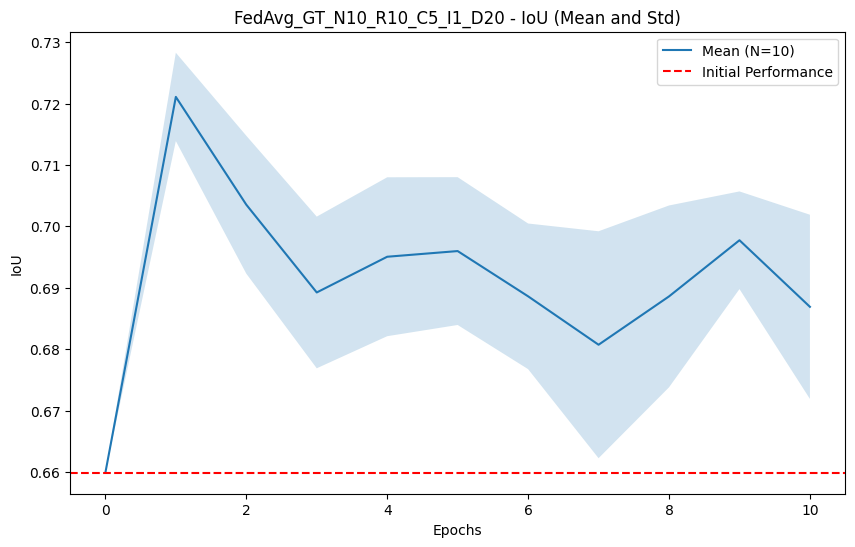

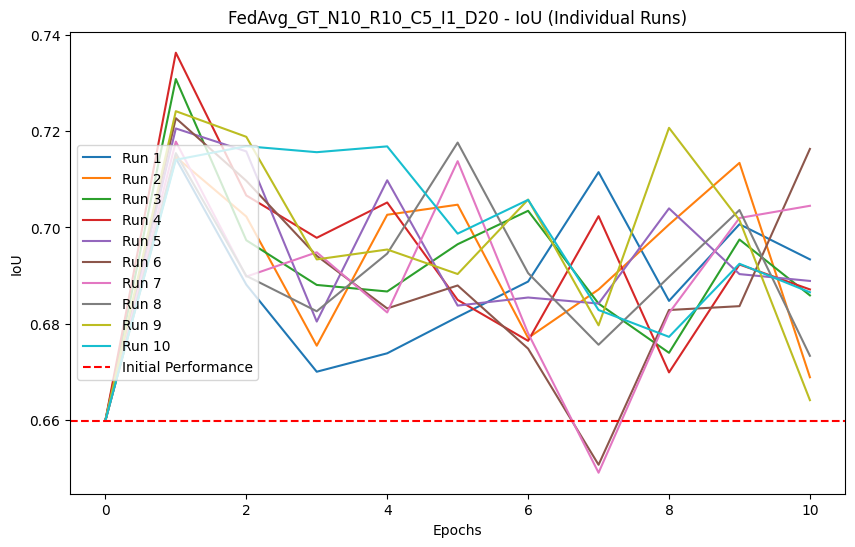

In [3]:
config = {
    "RUNS": 10,
    "ROUNDS": 10,
    "N_CLIENTS": 5,
    "CLIENT_ITERATIONS": 1,
    "N_DATAPOINTS_PER_ROUND": 20,
    "USE_MCD": False
}

run_experiment(config)

### Experiment 1.2 - MCD with few Data

Epoch 1/1: 100%|██████████| 20/20 [00:16<00:00,  1.25it/s]


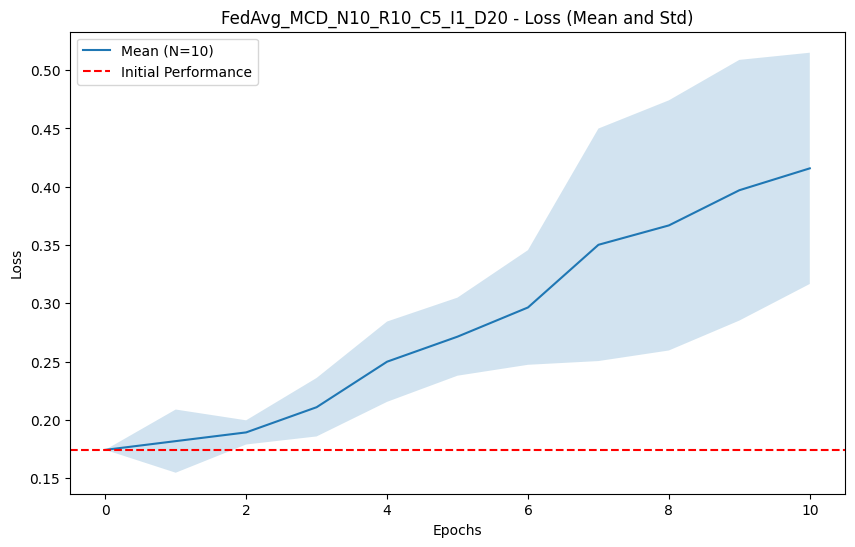

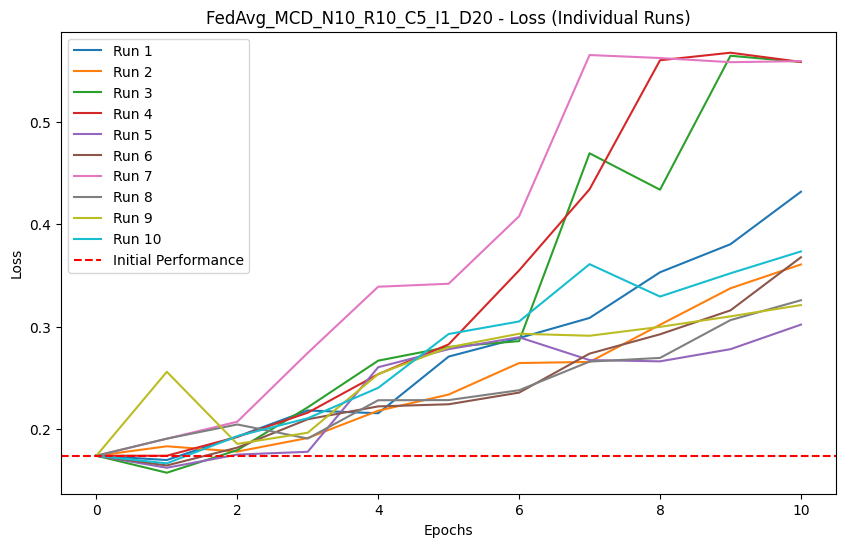

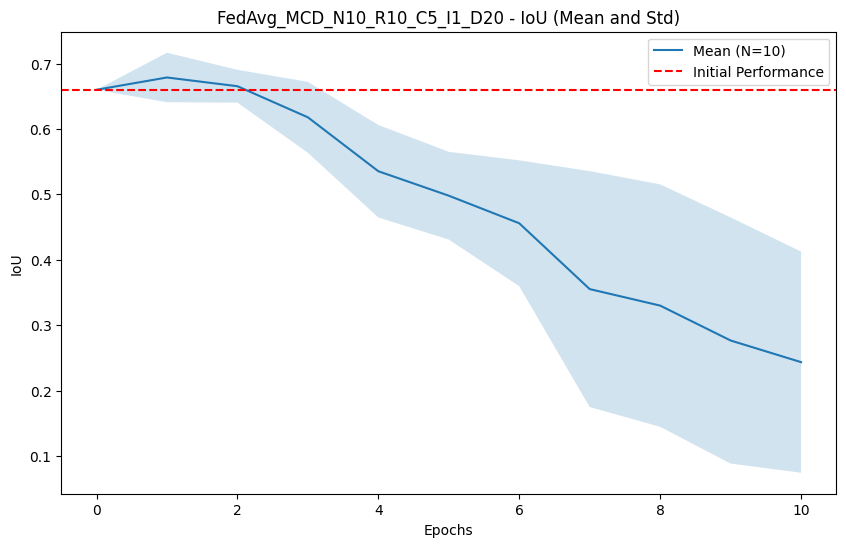

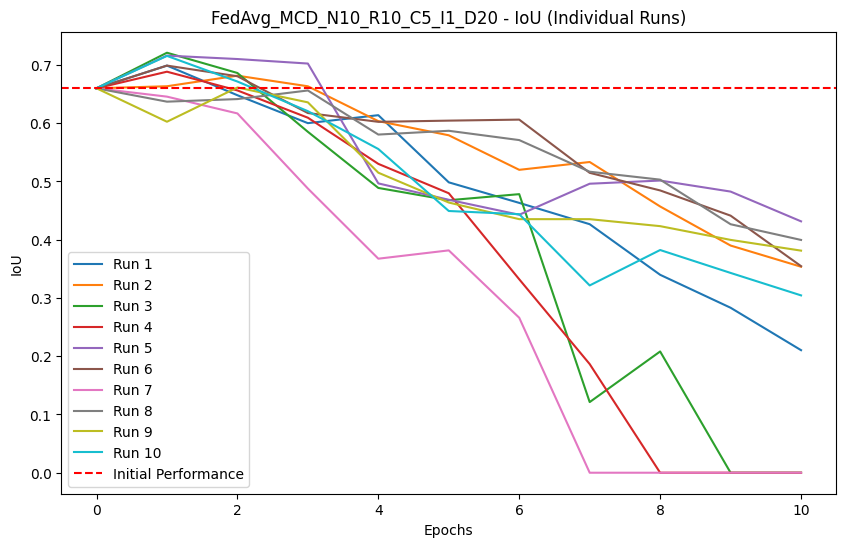

In [4]:
config = {
    "RUNS": 10,
    "ROUNDS": 10,
    "N_CLIENTS": 5,
    "CLIENT_ITERATIONS": 1,
    "N_DATAPOINTS_PER_ROUND": 20,
    "USE_MCD": True
}
    
run_experiment(config)

### Experiment 1.3 - MCD with more Data

Epoch 1/1: 100%|██████████| 50/50 [00:31<00:00,  1.59it/s]


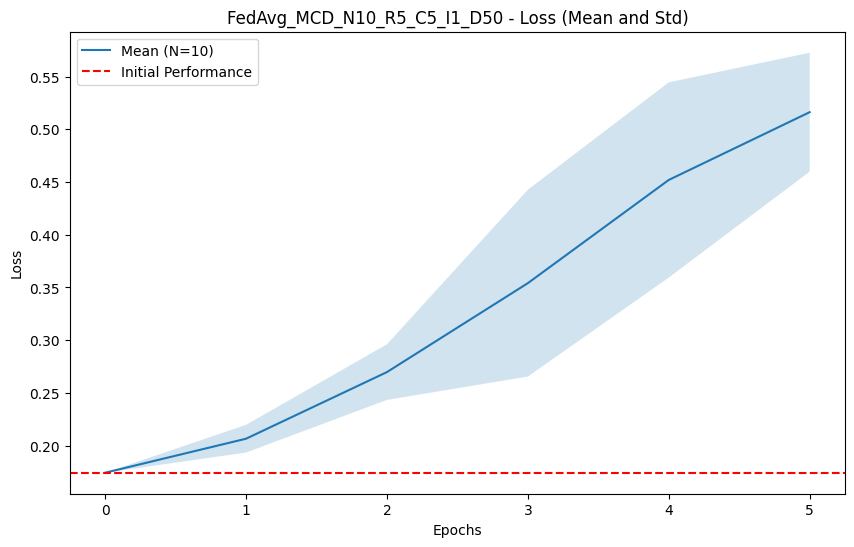

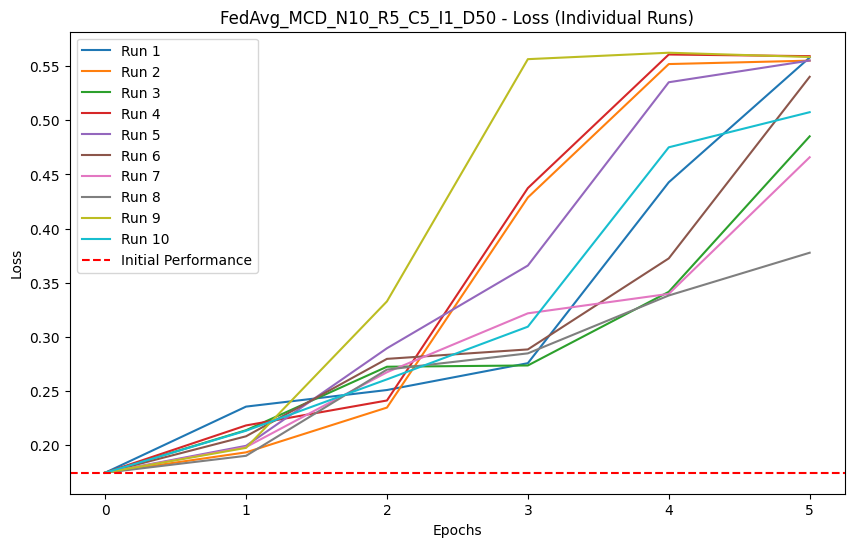

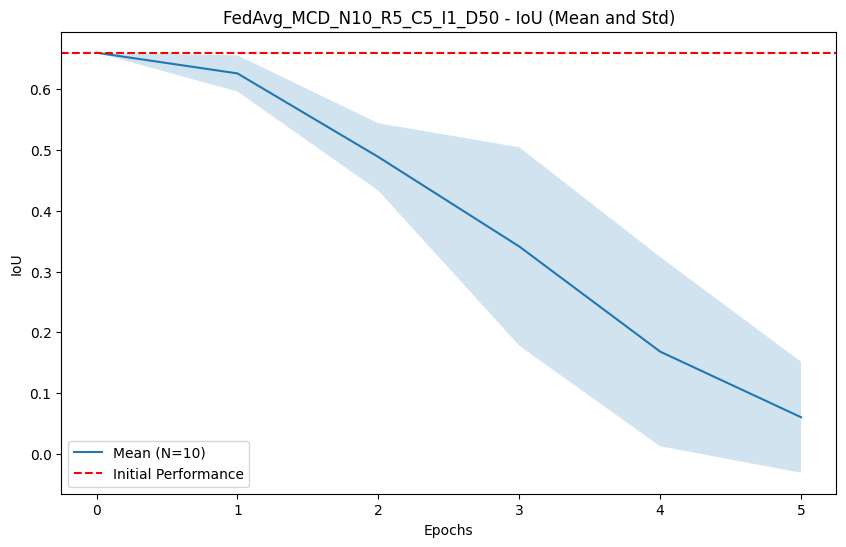

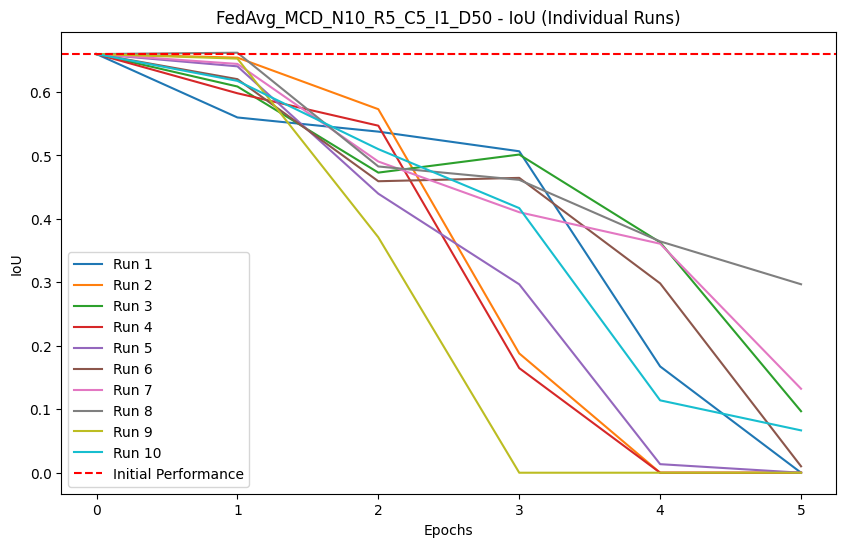

In [3]:
config = {
    "RUNS": 10,
    "ROUNDS": 5,
    "N_CLIENTS": 5,
    "CLIENT_ITERATIONS": 1,
    "N_DATAPOINTS_PER_ROUND": 50,
    "USE_MCD": True
}
    
run_experiment(config)

### Experiment 1.4 - MCD with very few Datapoints

Epoch 1/1: 100%|██████████| 5/5 [00:08<00:00,  1.79s/it]


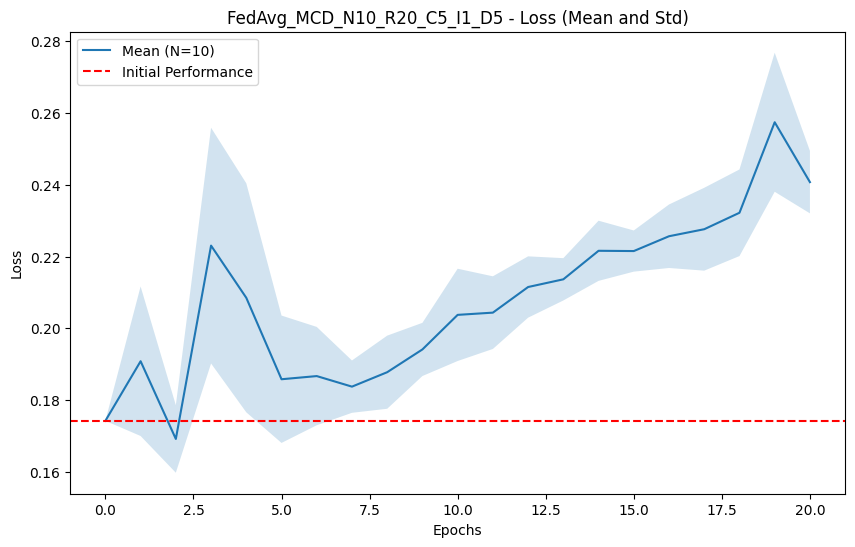

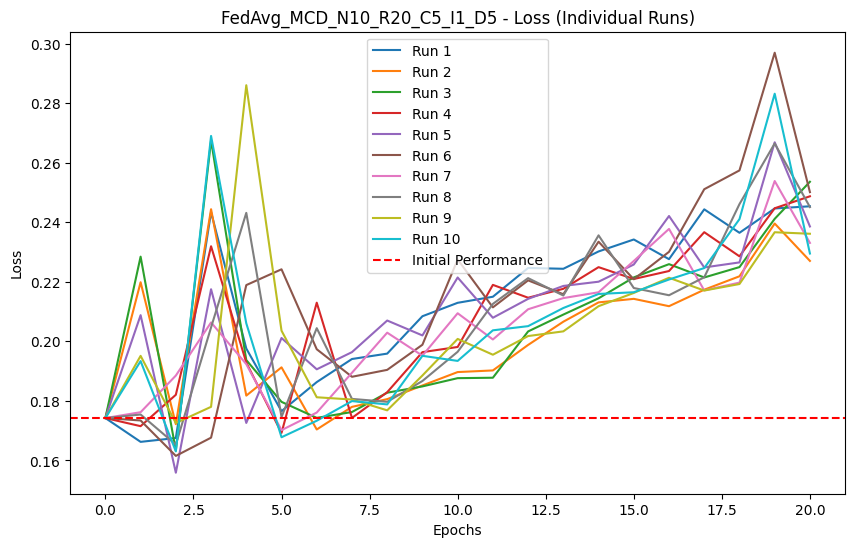

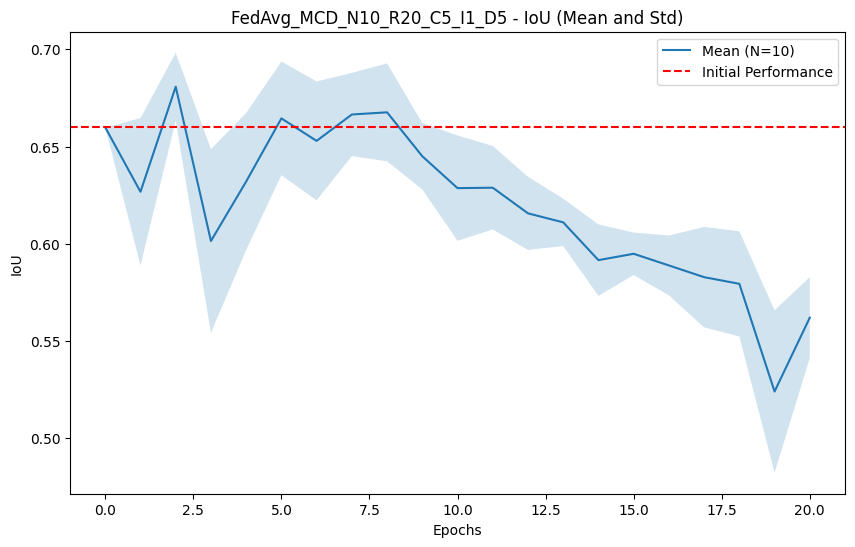

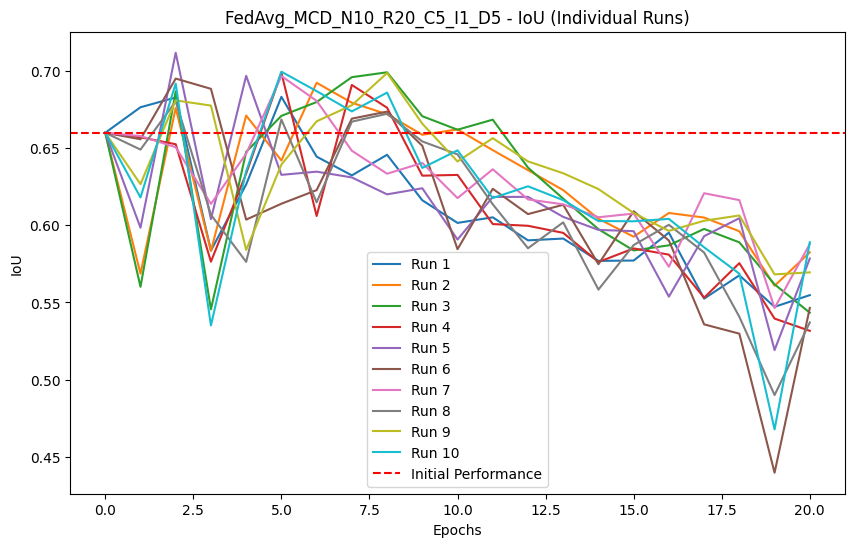

In [3]:
config = {
    "RUNS": 10,
    "ROUNDS": 20,
    "N_CLIENTS": 5,
    "CLIENT_ITERATIONS": 1,
    "N_DATAPOINTS_PER_ROUND": 5,
    "USE_MCD": True
}
    
run_experiment(config)